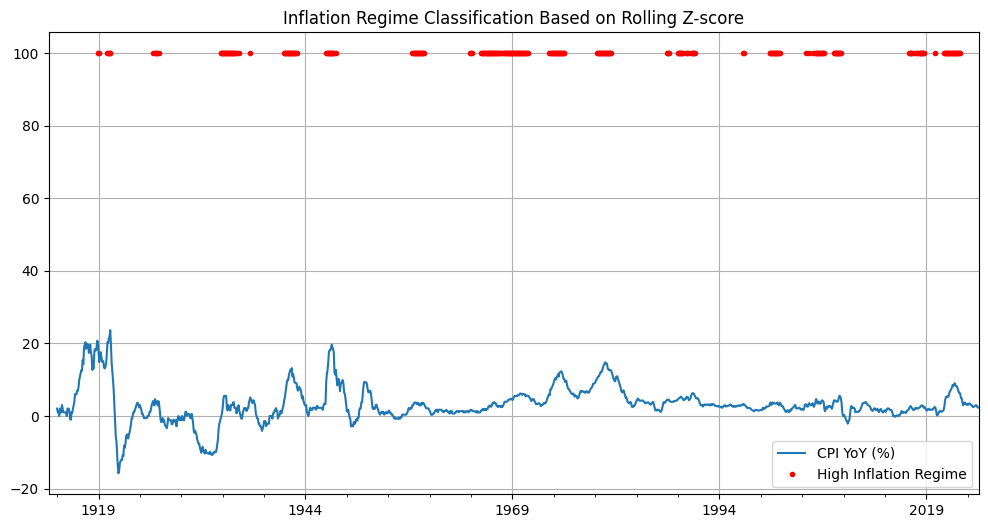

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CPI_YoY from the correct directory
file_path = r'C:\Users\ghkjs\GitHub\regime-shift-classification\data\processed\cpi_yoy_percent.csv'
cpi_yoy = pd.read_csv(file_path, index_col=0, parse_dates=True)
cpi_yoy = cpi_yoy.rename(columns={'CPI_YoY': 'CPI_YoY'})  # redundant but safe

# Compute rolling statistics (5 years = 60 months)
rolling_mean = cpi_yoy['CPI_YoY'].rolling(window=60).mean()
rolling_std = cpi_yoy['CPI_YoY'].rolling(window=60).std()

# Compute Z-score
zscore = (cpi_yoy['CPI_YoY'] - rolling_mean) / rolling_std

# Create regime label: 1 = High Inflation, 0 = Low Inflation
cpi_yoy['Zscore'] = zscore
cpi_yoy['Inflation_Regime'] = (zscore > 1.0).astype(int)

# Visualize
fig, ax = plt.subplots(figsize=(12, 6))
cpi_yoy['CPI_YoY'].plot(ax=ax, label='CPI YoY (%)')
cpi_yoy['Inflation_Regime'].apply(lambda x: 100 if x == 1 else None).plot(ax=ax, style='r.', label='High Inflation Regime')
plt.title('Inflation Regime Classification Based on Rolling Z-score')
plt.legend()
plt.grid(True)
plt.show()

# Optional: Save labeled data
cpi_yoy.to_csv(r'C:\Users\ghkjs\GitHub\regime-shift-classification\data\processed\cpi_labeled_regimes.csv')
